ME 574 Spring 2020 Homework #5 - Due Thursday June 4

This homework involves exploring CUDA-powered libraries/modules/packages.

__1)__  We looked at the sample code file `fft_demo.py` that demonstrates how to use some of the functionality provided by the the fast fourier transform module `numpy.fft` to accomplish common tasks like filtering and differentiation. Here we want to take the next step and employ the parallel fast fourier transform module provided by `cupy` which is billed as "A NumPy-compatible matrix library accelerated by CUDA". For more info about `cupy` you can check out the website:

https://cupy.chainer.org/

This problem focuses on using the `cupy.fft` module which aims to provide a "drop-in" parallel replacement for `numpy.fft` which means that they aim to provide GPU-accelerated versions of the same functionality with matching function calls (i.e., the same function names and arguments).

__1a)__ Install `cupy`. Their website gives full installation instructions, but this simple approach worked nicely for me, and I hope it does likewise for you:

- Open a terminal and run the "NVIDIA System Management Interface" command `nvidia-smi`.
- Note your CUDA version number which should appear in the upper right corner of the `nvidia-smi` output.
- Install `cupy` by running the appropriate terminal command for your CUDA version. If you are running CUDA 10.2, the installation command is `pip install cupy-cuda102`.
- Run one of the sample snippets from the `cupy` web page to make sure that things have installed properly.

__1b)__ Modify the `fft_demo.py` code (shown below) so that it runs in parallel on the GPU using by replacing the calls to functions from `numpy.fft` with calls to the corresponding functions from `cupy.fft`.

Note that `numpy` functions operate on `numpy` arrays and `cupy` functions operate on `cupy` arrays, so you will need to be able to get data across the "digital divide". For that purpose, check out the documentation for `cupy.asarray()` (to get `numpy` data into `cupy`) and `cupy.asnumpy()` (to get `cupy` data back to `numpy`).


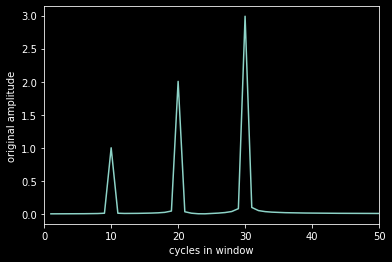

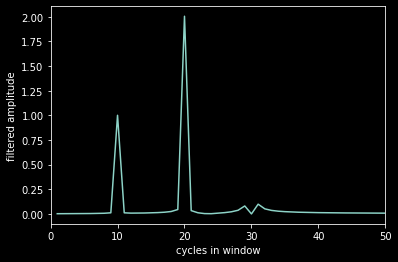

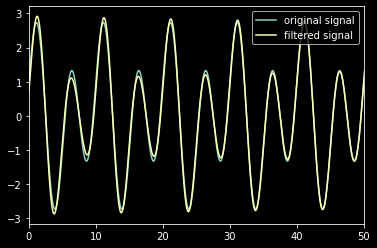

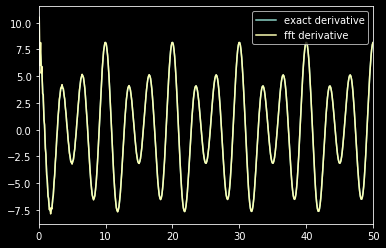

In [3]:
%run main.py

__1c)__ Use `cupy` to do the following:

- Create `noise` consisting of an array of `pts` random values chosen from a uniform distribution over the interval $[-3,3]$.
- Create a noisy signal by adding noise to the original signal: `y_n = y + noise`
- Compute and plot the frequency content of the noisy signal.
- Create and apply an appropriate filter to suppress noise in the frequency domain.
- Invert the filtered fft to obtain a "denoised signal".
- Plot and compare the original, noisy, and denoised signals.

__2)__ We looked at the Jacobi iteration method for solving systems derived from finite difference approximations. The "big matrix" version of the 1D Poisson equation involves an $n \times n$ matrix $J(n)$ full of zeros except for the diagonals adjacent to the main diagonal where each of the entries is $1/2$. When we experimented with an iterative approach, we observed that the convergence was quite slow and that inspires a closer look at the eigenvalues and eigenvectors of the matrix $J(n)$.

Use `cupy` and `cupyx.scipy.spare.diags()` to construct the matrix $J(n)$ and compute its leading eigenvalue (the one with the largest magnitude) and the associated eigenvector for $n = 50$ and $n = 500$.  

Note that you may need to convert the sparse matrix to a dense array with `cupyx.scipy.sparse.dia_matrix.toarray()` before you can compute the eigenvalues/vectors.

What is the value of the leading eigenvalue and how does it behave as $n$ becomes large?

Provide a brief description of the corresponding eigenvector.

__ 3) __ Using `cupy`, explore the distribution of eigenvalues in random symmetric matrices. (Note that this concept has real applications in nuclear physics and quantum information theory. The seminal results are attributed to Eugene Wigner who won the Nobel Prize for Physics in 1963.)

__3a)__ Write python code using `cupy` to implement a function `rand_mat_gauss(n)` that creates a real symmetric $n \times n$ array of numbers selected from $N(0,1)$, the normal distribution with mean zero and standard deviation 1. Note that you can start by constructing a non-symmetric matrix $B$ and then construct the symmetric matrix $A = \frac{1}{\sqrt{2}}(B + B^T)$ whose entries should also belong to the distribution $N(0,1)$.

__3b)__ Test your code by creating a "small-ish" (say $10 \times 10$) array. Verify that the matrix is symmetric, and plot the histogram of the entries together with the normal distribution to verify that the distribution is plausible. For an example of how to do that with numpy, see
https://www.tutorialspoint.com/python_data_science/python_normal_distribution.htm

__3c)__ Create a matrix `m = rand_mat_gauss(n)` with $n = 1000$. Use `cupy` to compute the eigenvalues of the matrix, and plot the histrogram of the eigenvalues. (Recall that real symmetric matrices have real eigenvalues.) Describe the distribution of the eigenvalues.

__3d)__ Repeat 3c with $n = 2000$ and $n = 4000$. Describe the distribution of the eigenvalues. What features are independent of $n$? Identify a feature $F$ that depends on $n$ and determine the relationship; i.e. find $F(n)$. (You may find it enlightening to scale your eigenvalues by a factor of $\sqrt{n}$).

__ PROBLEM 4 IS OPTIONAL.__ Here we explore how the results obtained in problem 3 depend on the distribution from which the random matrix entries are chosen.

__4a)__ Repeat problem 3 but with matrix entries chosen uniformly from $\{-1,1\}$ instead of from a normal distribution. This time you will need to write a function `rand_mat_plusminus(n)` that produces an $n \times n$ array that is symmetric and any individual element is equally likely to be $+1$ or $-1$.

Again explore the distribution of the eigenvalues and the dependence on $n$. 

___For this problem, exclude the largest eigenvalue before computing the histogram.___


When the distribution from which elements are chosen is changed, what is preserved and what changes?

__4b)__ Repeat 4a but with matrix entries chosen randomly from a uniform distribution on the interval $[-1,1]$. This time you will need to write a function `rand_mat_uniform(n)` that produces an $n \times n$ array that is symmetric and any individual element is chosen randomly from $[-1,1]$.

Again explore the distribution of the eigenvalues and the dependence on $n$. When the distribution is changed this time, what is preserved and what changes?